## carcando libreria

In [1]:
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



## visualizando los datos

In [2]:
head(UN11)

,region,group,fertility,ppgdp,lifeExpF,pctUrban
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,other,5.968,499.0,49.49,23
Albania,Europe,other,1.525,3677.2,80.40,53
Algeria,Africa,africa,2.142,4473.0,75.00,67
Angola,Africa,africa,5.135,4321.9,53.17,59
Anguilla,Caribbean,other,2.000,13750.1,81.10,100
Argentina,Latin Amer,other,2.172,9162.1,79.89,93


In [3]:
class(UN11$group)

[1] "factor"

In [4]:
levels(UN11$group)

[1] "oecd"   "other"  "africa"

## Definicion de variables indicadoras a partir de la variable group

In [5]:
UN11.trans <- transform(UN11, indic=model.matrix(~ -1 + group, UN11) )
head(UN11.trans)

,region,group,fertility,ppgdp,lifeExpF,pctUrban,indic.groupoecd,indic.groupother,indic.groupafrica
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,other,5.968,499.0,49.49,23,0,1,0
Albania,Europe,other,1.525,3677.2,80.40,53,0,1,0
Algeria,Africa,africa,2.142,4473.0,75.00,67,0,0,1
Angola,Africa,africa,5.135,4321.9,53.17,59,0,0,1
Anguilla,Caribbean,other,2.000,13750.1,81.10,100,0,1,0
Argentina,Latin Amer,other,2.172,9162.1,79.89,93,0,1,0


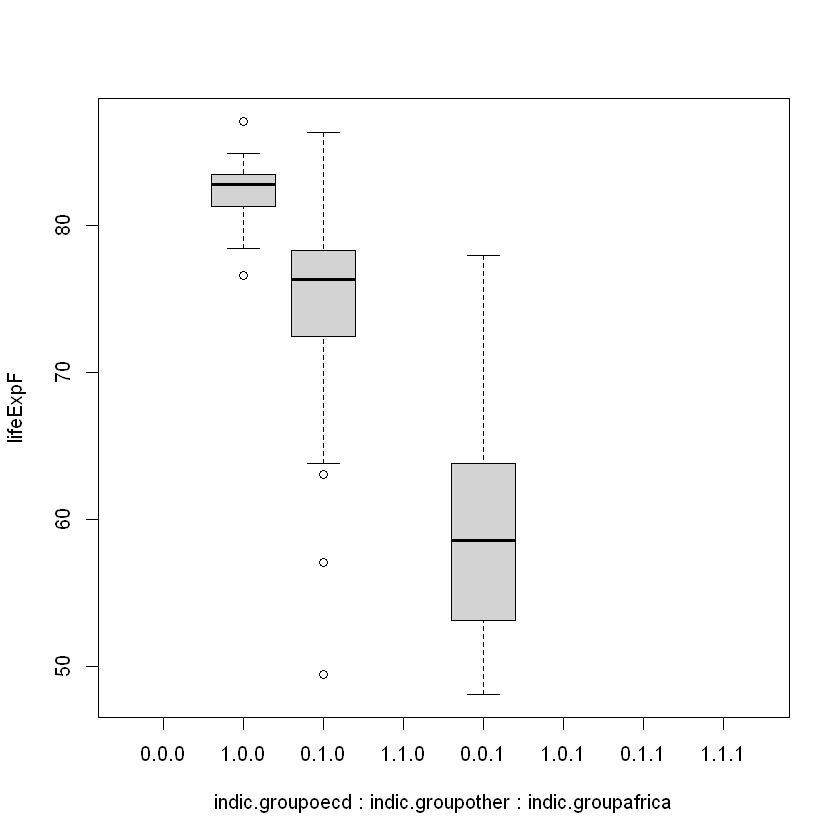

In [6]:
with( UN11.trans, boxplot(lifeExpF ~ indic.groupoecd+indic.groupother + indic.groupafrica) )

## Modelo en terminos de variables indicadoras con intercepto

In [7]:
results1 <- lm(lifeExpF ~ indic.groupother + indic.groupafrica, data=UN11.trans)

summary(results1)


Call:
lm(formula = lifeExpF ~ indic.groupother + indic.groupafrica, 
    data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8367  -3.3045   0.3635   2.7183  18.2277 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         82.446      1.128  73.095  < 2e-16 ***
indic.groupother    -7.120      1.271  -5.602  7.1e-08 ***
indic.groupafrica  -22.674      1.420 -15.968  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.28 on 196 degrees of freedom
Multiple R-squared:  0.6191,	Adjusted R-squared:  0.6152 
F-statistic: 159.3 on 2 and 196 DF,  p-value: < 2.2e-16


## Modelo en terminos de variables indicadoras sin intercepto
### Nota: Los coeficientes de cada variable representan las medias de cada grupo

In [8]:
results2 <- lm(lifeExpF ~ 0 + indic.groupoecd + indic.groupother + indic.groupafrica, data=UN11.trans)

summary(results2)


Call:
lm(formula = lifeExpF ~ 0 + indic.groupoecd + indic.groupother + 
    indic.groupafrica, data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8367  -3.3045   0.3635   2.7183  18.2277 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
indic.groupoecd    82.4465     1.1279   73.09   <2e-16 ***
indic.groupother   75.3267     0.5856  128.63   <2e-16 ***
indic.groupafrica  59.7723     0.8626   69.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.28 on 196 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9926 
F-statistic:  8896 on 3 and 196 DF,  p-value: < 2.2e-16


In [9]:
linearHypothesis(results2, c("indic.groupoecd = indic.groupother"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,197,8967.933,NA,NA,NA,NA
2,196,7730.188,1,1237.745,31.38319,7.100658e-08


## Modelo en terminos del factor group con intercepto

In [10]:
results3 <- lm(lifeExpF ~ group, data=UN11.trans)

summary(results3)


Call:
lm(formula = lifeExpF ~ group, data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8367  -3.3045   0.3635   2.7183  18.2277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   82.446      1.128  73.095  < 2e-16 ***
groupother    -7.120      1.271  -5.602  7.1e-08 ***
groupafrica  -22.674      1.420 -15.968  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.28 on 196 degrees of freedom
Multiple R-squared:  0.6191,	Adjusted R-squared:  0.6152 
F-statistic: 159.3 on 2 and 196 DF,  p-value: < 2.2e-16


## Modelo en terminos del factor group sin intercepto
## Nota: Los coeficientes de cada variable representan las medias de cada grupo

In [11]:
results4 <- lm(lifeExpF ~ 0 + group, data=UN11.trans)

summary(results4)


Call:
lm(formula = lifeExpF ~ 0 + group, data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8367  -3.3045   0.3635   2.7183  18.2277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
groupoecd    82.4465     1.1279   73.09   <2e-16 ***
groupother   75.3267     0.5856  128.63   <2e-16 ***
groupafrica  59.7723     0.8626   69.29   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.28 on 196 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9926 
F-statistic:  8896 on 3 and 196 DF,  p-value: < 2.2e-16


In [12]:
UN11.trans <- transform(UN11.trans,group.unordered=relevel(group, "africa") )
head(UN11.trans)

,region,group,fertility,ppgdp,lifeExpF,pctUrban,indic.groupoecd,indic.groupother,indic.groupafrica,group.unordered
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,Asia,other,5.968,499.0,49.49,23,0,1,0,other
Albania,Europe,other,1.525,3677.2,80.40,53,0,1,0,other
Algeria,Africa,africa,2.142,4473.0,75.00,67,0,0,1,africa
Angola,Africa,africa,5.135,4321.9,53.17,59,0,0,1,africa
Anguilla,Caribbean,other,2.000,13750.1,81.10,100,0,1,0,other
Argentina,Latin Amer,other,2.172,9162.1,79.89,93,0,1,0,other


## Modelo en terminos del factor group con intercepto con africa como grupo de referencia

In [13]:
results5 <- lm(lifeExpF ~ group.unordered, data=UN11.trans)

summary(results5)


Call:
lm(formula = lifeExpF ~ group.unordered, data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.8367  -3.3045   0.3635   2.7183  18.2277 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           59.7723     0.8626   69.29   <2e-16 ***
group.unorderedoecd   22.6742     1.4200   15.97   <2e-16 ***
group.unorderedother  15.5545     1.0426   14.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.28 on 196 degrees of freedom
Multiple R-squared:  0.6191,	Adjusted R-squared:  0.6152 
F-statistic: 159.3 on 2 and 196 DF,  p-value: < 2.2e-16


## Grafica de lifeEXpF vs log(ppgdp) diferenciando grupos

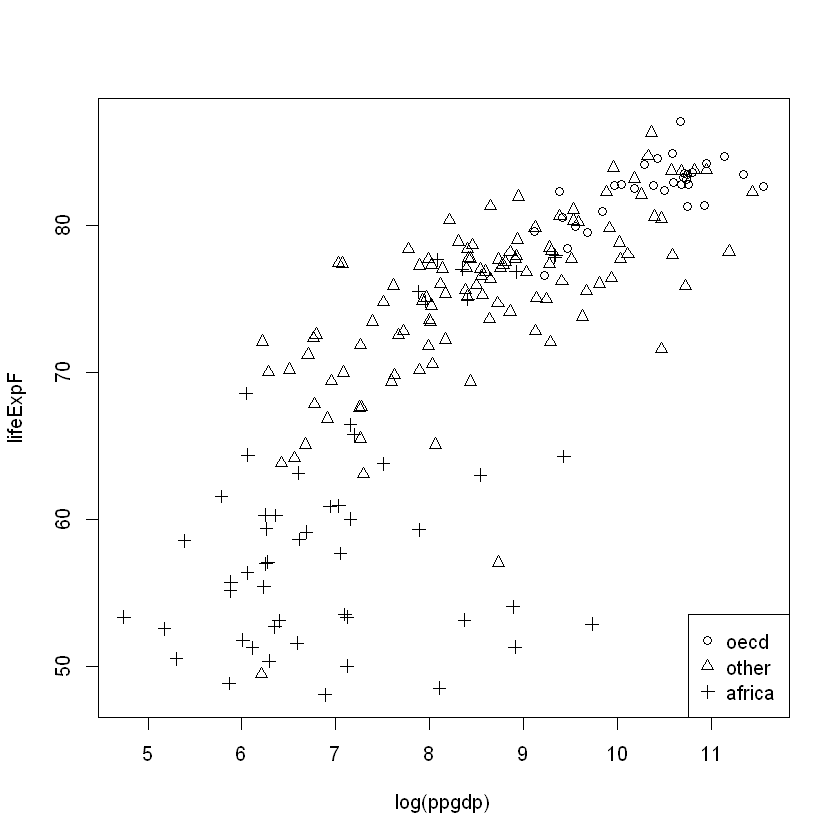

In [14]:
with(UN11.trans, plot(log(ppgdp),lifeExpF, pch=as.numeric(group) ) )
legend("bottomright", legend=c( "oecd", "other", "africa"), pch=1:3 )

## Modelo diferente para cada grupo con predictor log(ppgpd) usando variables indicadoras

In [15]:
results6 <- lm( lifeExpF ~ indic.groupother + indic.groupafrica + log(ppgdp) +
                  indic.groupother*log(ppgdp) + indic.groupafrica*log(ppgdp), data=UN11.trans  )
summary(results6)


Call:
lm(formula = lifeExpF ~ indic.groupother + indic.groupafrica + 
    log(ppgdp) + indic.groupother * log(ppgdp) + indic.groupafrica * 
    log(ppgdp), data = UN11.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.634  -2.089   0.301   2.255  14.489 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   59.2137    15.2203   3.890 0.000138 ***
indic.groupother             -11.1731    15.5948  -0.716 0.474572    
indic.groupafrica            -22.9848    15.7838  -1.456 0.146954    
log(ppgdp)                     2.2425     1.4664   1.529 0.127844    
indic.groupother:log(ppgdp)    0.9294     1.5177   0.612 0.540986    
indic.groupafrica:log(ppgdp)   1.0950     1.5785   0.694 0.488703    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.129 on 193 degrees of freedom
Multiple R-squared:  0.7498,	Adjusted R-squared:  0.7433 
F-statistic: 115.7 on 5 and 193 DF,  p-val

## Modelo diferente para cada grupo con predictor log(ppgpd) usando factor group

In [16]:
results7 <- lm( lifeExpF ~ group * log(ppgdp), data=UN11.trans  )
summary(results7)


Call:
lm(formula = lifeExpF ~ group * log(ppgdp), data = UN11.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.634  -2.089   0.301   2.255  14.489 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             59.2137    15.2203   3.890 0.000138 ***
groupother             -11.1731    15.5948  -0.716 0.474572    
groupafrica            -22.9848    15.7838  -1.456 0.146954    
log(ppgdp)               2.2425     1.4664   1.529 0.127844    
groupother:log(ppgdp)    0.9294     1.5177   0.612 0.540986    
groupafrica:log(ppgdp)   1.0950     1.5785   0.694 0.488703    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.129 on 193 degrees of freedom
Multiple R-squared:  0.7498,	Adjusted R-squared:  0.7433 
F-statistic: 115.7 on 5 and 193 DF,  p-value: < 2.2e-16


In [17]:
with(UN11.trans, lines(log(ppgdp[group=="africa"]), fitted.values(results7)[group=="africa"]) )

with(UN11.trans, lines(log(ppgdp[group=="other"]), fitted.values(results7)[group=="other"]) )

with(UN11.trans, lines(log(ppgdp[group=="oecd"]), fitted.values(results7)[group=="oecd"]) )

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


## Prueba de que las pendientes de las lineas de los grupos africa y other son iguales

In [18]:
linearHypothesis(results7, c("groupother:log(ppgdp) = groupafrica:log(ppgdp)"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,194,5079.158,NA,NA,NA,NA
2,193,5077.698,1,1.459704,0.05548241,0.8140339


## Modelo diferente para cada grupo pero mismo coeficiente de log(ppgpd) para grupos africa y other


In [19]:
UN11.trans$indica.group.other.africa.log.ppgpd <- (UN11.trans$indic.groupother + UN11.trans$indic.groupafrica)*
                                                  log(UN11.trans$ppgdp)

In [20]:
results8 <- lm( lifeExpF ~ indic.groupother + indic.groupafrica + log(ppgdp) +
                indica.group.other.africa.log.ppgpd, data=UN11.trans  )
summary(results8)


Call:
lm(formula = lifeExpF ~ indic.groupother + indic.groupafrica + 
    log(ppgdp) + indica.group.other.africa.log.ppgpd, data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6407  -2.1809   0.2879   2.2338  14.6066 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          59.2137    15.1832   3.900 0.000133 ***
indic.groupother                    -11.6138    15.4445  -0.752 0.452979    
indic.groupafrica                   -22.1785    15.3705  -1.443 0.150654    
log(ppgdp)                            2.2425     1.4629   1.533 0.126912    
indica.group.other.africa.log.ppgpd   0.9807     1.4983   0.655 0.513564    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.117 on 194 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7446 
F-statistic: 145.3 on 4 and 194 DF,  p-value: < 2.2e-16


## Prueba de que las pendientes de las lineas de los tres grupos son iguales

In [21]:
linearHypothesis(results7, c("groupother:log(ppgdp) =0", "groupafrica:log(ppgdp)=0"))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,195,5090.373,NA,NA,NA,NA
2,193,5077.698,2,12.67503,0.2408849,0.786168


## Modelo de 3 lineas paralelas usando variables indicadoras

In [22]:
results9 <- lm( lifeExpF ~ indic.groupother + indic.groupafrica + log(ppgdp), data=UN11.trans  )
summary(results9)


Call:
lm(formula = lifeExpF ~ indic.groupother + indic.groupafrica + 
    log(ppgdp), data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6348  -2.1741   0.2441   2.3537  14.6539 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         49.529      3.400  14.569  < 2e-16 ***
indic.groupother    -1.535      1.174  -1.308    0.193    
indic.groupafrica  -12.170      1.557  -7.814 3.35e-13 ***
log(ppgdp)           3.177      0.316  10.056  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.109 on 195 degrees of freedom
Multiple R-squared:  0.7492,	Adjusted R-squared:  0.7453 
F-statistic: 194.1 on 3 and 195 DF,  p-value: < 2.2e-16


## Modelo de 3 lineas paralelas usando factor group

In [23]:
results10 <- lm( lifeExpF ~ group + log(ppgdp), data=UN11.trans  )
summary(results10)


Call:
lm(formula = lifeExpF ~ group + log(ppgdp), data = UN11.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6348  -2.1741   0.2441   2.3537  14.6539 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.529      3.400  14.569  < 2e-16 ***
groupother    -1.535      1.174  -1.308    0.193    
groupafrica  -12.170      1.557  -7.814 3.35e-13 ***
log(ppgdp)     3.177      0.316  10.056  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.109 on 195 degrees of freedom
Multiple R-squared:  0.7492,	Adjusted R-squared:  0.7453 
F-statistic: 194.1 on 3 and 195 DF,  p-value: < 2.2e-16


# otros metodos

## cargando datos

In [24]:
salaries <- read.table("C:/Users/marti/OneDrive/Escritorio/jupyter/database/salario.txt",header=T)

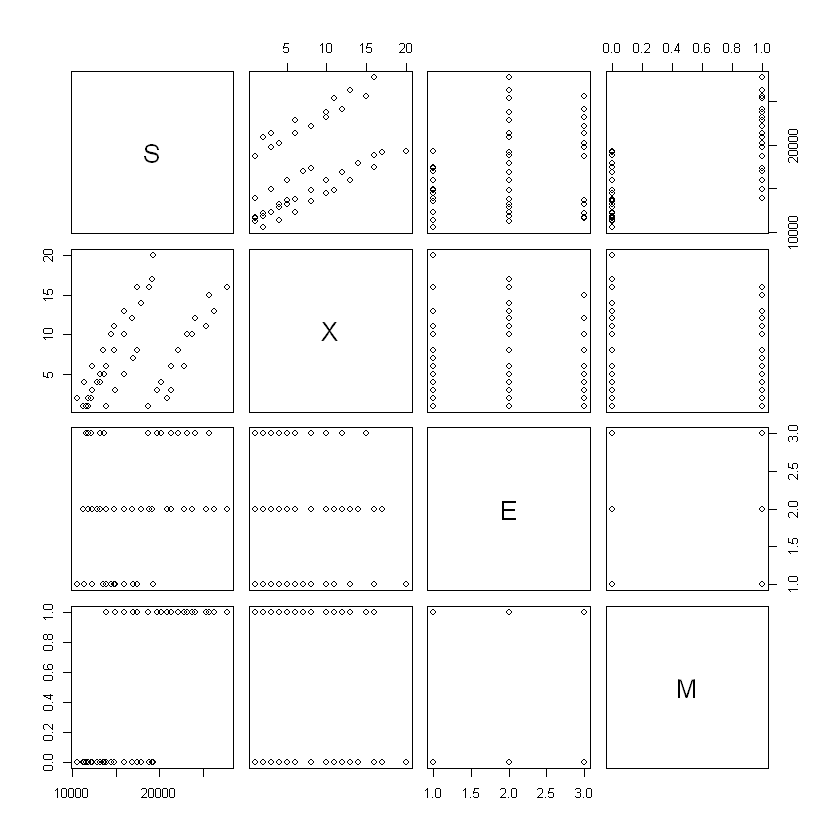

In [25]:
with(salaries, pairs(~S+X+E+M) )

## Definicion de variables indicadoras a partir de la variable nivel de educacion E

In [26]:
salaries

S,X,E,M
<int>,<int>,<int>,<int>
13876,1,1,1
11608,1,3,0
18701,1,3,1
11283,1,2,0
11767,1,3,0
20872,2,2,1
11772,2,2,0
10535,2,1,0
12195,2,3,0


In [28]:
salaries$E <- as.factor(salaries$E)

salaries.trans <- transform(salaries, indic=model.matrix(~ -1 + E, salaries) )
salaries.trans

,S,X,E,M,indic.E1,indic.E2,indic.E3
,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,13876,1,1,1,1,0,0
2,11608,1,3,0,0,0,1
3,18701,1,3,1,0,0,1
4,11283,1,2,0,0,1,0
5,11767,1,3,0,0,0,1
6,20872,2,2,1,0,1,0
7,11772,2,2,0,0,1,0
8,10535,2,1,0,1,0,0
9,12195,2,3,0,0,0,1


## Modelo con misma pendiente y sin interaccion usando variables indicadoras

In [31]:
regre1 <- lm(S ~ X + indic.E2 + indic.E3 + M, data=salaries.trans)
summary(regre1)


Call:
lm(formula = S ~ X + indic.E2 + indic.E3 + M, data = salaries.trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-1884.60  -653.60    22.23   844.85  1716.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8035.60     386.69  20.781  < 2e-16 ***
X             546.18      30.52  17.896  < 2e-16 ***
indic.E2     3144.04     361.97   8.686 7.73e-11 ***
indic.E3     2996.21     411.75   7.277 6.72e-09 ***
M            6883.53     313.92  21.928  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1027 on 41 degrees of freedom
Multiple R-squared:  0.9568,	Adjusted R-squared:  0.9525 
F-statistic: 226.8 on 4 and 41 DF,  p-value: < 2.2e-16


## Modelo con misma pendiente y con interaccion usando variables indicadoras

In [32]:
regre2 <- lm(S ~ X + indic.E2 + indic.E3 + M + indic.E2*M + indic.E3*M, data=salaries.trans)
summary(regre2)


Call:
lm(formula = S ~ X + indic.E2 + indic.E3 + M + indic.E2 * M + 
    indic.E3 * M, data = salaries.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-928.13  -46.21   24.33   65.88  204.89 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9472.685     80.344  117.90   <2e-16 ***
X            496.987      5.566   89.28   <2e-16 ***
indic.E2    1381.671     77.319   17.87   <2e-16 ***
indic.E3    1730.748    105.334   16.43   <2e-16 ***
M           3981.377    101.175   39.35   <2e-16 ***
indic.E2:M  4902.523    131.359   37.32   <2e-16 ***
indic.E3:M  3066.035    149.330   20.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 173.8 on 39 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9986 
F-statistic:  5517 on 6 and 39 DF,  p-value: < 2.2e-16


## Modelo con misma pendiente y con interaccion usando facores E y M

In [33]:
salaries$M <- as.factor(salaries$M)

In [34]:
regre3 <- lm(S ~ X + E*M, data=salaries.trans)
summary(regre3)


Call:
lm(formula = S ~ X + E * M, data = salaries.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-928.13  -46.21   24.33   65.88  204.89 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9472.685     80.344  117.90   <2e-16 ***
X            496.987      5.566   89.28   <2e-16 ***
E2          1381.671     77.319   17.87   <2e-16 ***
E3          1730.748    105.334   16.43   <2e-16 ***
M           3981.377    101.175   39.35   <2e-16 ***
E2:M        4902.523    131.359   37.32   <2e-16 ***
E3:M        3066.035    149.330   20.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 173.8 on 39 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9986 
F-statistic:  5517 on 6 and 39 DF,  p-value: < 2.2e-16


## Modelo con interaccion entre las tres variables

In [35]:
regre4 <- lm(S ~ X*E*M, data=salaries.trans)
summary(regre4)


Call:
lm(formula = S ~ X * E * M, data = salaries.trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-918.00  -41.23   14.18   64.78  222.88 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9481.390    128.438  73.821  < 2e-16 ***
X            496.117     11.284  43.966  < 2e-16 ***
E2          1327.046    161.150   8.235 1.31e-09 ***
E3          1708.064    201.534   8.475 6.73e-10 ***
M           3935.732    216.937  18.142  < 2e-16 ***
X:E2           6.493     15.068   0.431    0.669    
X:E3           6.247     51.896   0.120    0.905    
X:M            8.566     34.058   0.252    0.803    
E2:M        5062.692    277.689  18.232  < 2e-16 ***
E3:M        3158.650    294.852  10.713 1.94e-12 ***
X:E2:M       -22.062     38.300  -0.576    0.568    
X:E3:M       -18.416     62.751  -0.293    0.771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 184 on 34 degrees of freedom
Multiple R-squared:  0

## Prueba de que las pendientes son iguales 

In [36]:
anova(regre3,regre4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,39,1178168,NA,NA,NA,NA
2,34,1151575,5,26592.93,0.1570301,0.9764015
